# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most proftable item is one that the state makes the most money off of. The formula for how much the state profits off of each item sold is 'State Bottle Cost' - 'State Bottle Retail' = 'Markup'. To see the most profiatble item we need to find the quantity of each item purched and multiply that with 'Markup'. For each purchase we can find 'Profit' = 'Markup' * 'Bottles Sold'. Then we can group the dataframe by Item Number or Item Description and calculate the Sum of 'Profit' for each group. 

<Axes: xlabel='Profit', ylabel='Item Description'>

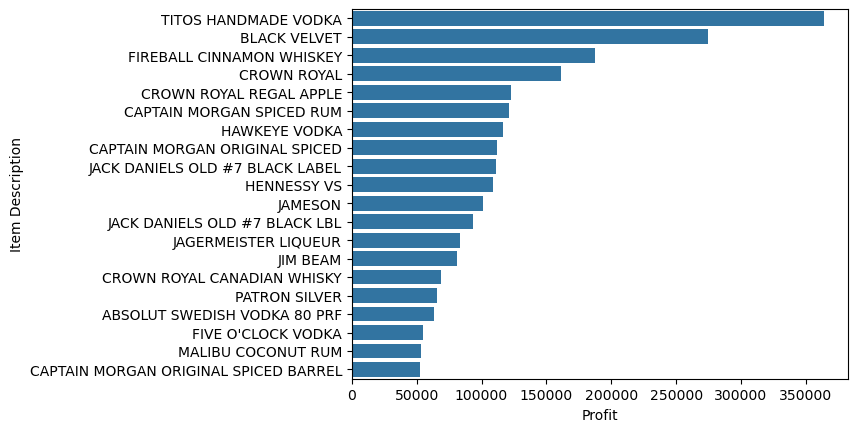

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
iowa = pd.read_csv('data/iowa.csv')
iowa['Markup'] = iowa['State Bottle Retail']-iowa['State Bottle Cost']
iowa['Profit'] = iowa['Markup']*iowa['Bottles Sold']
Profitable = (iowa.loc[:,['Profit','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Profit',ascending=False) )

top_profit = Profitable[:20]
sns.barplot(top_profit['Profit'], orient = 'h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

We get ```ValueError: operands could not be broadcast together with shapes (3,) (2,)``` when trying to run ```z = x-y ```

When reshaping x to (-1, 1) and y to (1, -1) we get 3 rows, 2 columns

```array([[-1, -4],[ 1, -2],[ 3,  0]])```

When reshaping x to (1, -1) and y to (-1, 1) we get 2 rows, 3 columns
```array([[-1,  1,  3],[-4, -2,  0]])```

In [50]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])
z = x.reshape(-1,1)-y.reshape(1,-1)
#z = x.reshape(1,-1)-y.reshape(-1,1)
z.shape

(3, 2)

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [4]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?